In [6]:
"""

The dataset used this project is retrieved from kaggle, the home of Data Science. There are three parts to our report, as follows:

Data Cleaning and Feature Engineering
Exploratory Data Analysis
Prediction of Loan Status
The major objective of this project is to predict whether the bank will approve the loan based on certain information. Therefore, this is a supervised classification problem to be trained. Algorithms tested for this project include Logistic Regression, Decision Tree Classifier, Random Forest Classifier, KNearest Neighbors, Support Vector Classifier and XGBoost Classifier. Hyperparametric tuning will be performed by sklearn's GridSearchCV. We will compare the results of these models to discover which algorithm works better for this specific dataset.


"""

"\n\nThe dataset used this project is retrieved from kaggle, the home of Data Science. There are three parts to our report, as follows:\n\nData Cleaning and Feature Engineering\nExploratory Data Analysis\nPrediction of Loan Status\nThe major objective of this project is to predict whether the bank will approve the loan based on certain information. Therefore, this is a supervised classification problem to be trained. Algorithms tested for this project include Logistic Regression, Decision Tree Classifier, Random Forest Classifier, KNearest Neighbors, Support Vector Classifier and XGBoost Classifier. Hyperparametric tuning will be performed by sklearn's GridSearchCV. We will compare the results of these models to discover which algorithm works better for this specific dataset.\n\n\n"

In [7]:
# Importing Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#import xgboost as xgb
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#import plotly.io as pio
#pio.renders.default='notebook'



In [8]:
# Loading Data

df=pd.read_csv('C:/Users/dani8003/Desktop/PYTHON/Loan Prediction/train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.shape

(614, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [11]:
# Data Cleaning


# First we create a dataframe that shows the percentage of null values in each column of df.

(df.isnull().sum()/df.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [12]:
df.shape[0]

614

In [13]:
# Now we select the columns that contain between 0.5% and 70% null values, and replace the null values 
# with the mean (for numerical columns) or median (for categorical columns) of each column.

In [14]:
# Gender
pd.get_dummies(df['Gender'].dropna(),drop_first=True).median()

Male    1.0
dtype: float64

In [15]:
df['Gender']=df['Gender'].fillna('Male')

In [16]:
df['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [17]:
# Depends
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [18]:
df['Dependents'].dtypes

dtype('O')

In [19]:
le=LabelEncoder()
le.fit(df['Dependents'].dropna())
pd.Series(le.transform(df['Dependents'].dropna())).median()

0.0

In [20]:
df['Dependents']=df['Dependents'].fillna('0')

In [21]:
# Self-Emloyed

df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [22]:
df['Self_Employed'].dtypes

dtype('O')

In [23]:
pd.get_dummies(df['Self_Employed'].dropna(),drop_first=True).median()

Yes    0.0
dtype: float64

In [24]:
df['Self_Employed']=df['Self_Employed'].fillna('Yes')

In [25]:
# Loan Amount
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [26]:
# Loan_Amount_Term

df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [27]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [28]:
# Credit History
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [29]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [30]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
# Married

# Fianlly the Married column that contain less than 0.5% null values is remainedand we drop the rows of df that contain these null values.

df.dropna(inplace=True)


In [32]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
# Feature Engineering


In [34]:
# Rename some of the columns

df.columns=df.columns.str.lower()


In [35]:
df.columns=['loan_id', 'gender', 'married', 'dependents', 'education','self_employed', 'applicant_income', 'co-applicant_income', 'loan_amount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']

In [36]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [37]:
df.shape

(611, 13)

In [38]:
df.describe()

,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history
count,611.000000,611.000000,611.000000,611.000000,611.000000
mean,5399.513912,1627.972046,146.370958,342.324059,0.854337
std,6120.764249,2931.747971,84.240751,64.208419,0.353057
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1213.000000,128.000000,360.000000,1.000000
75%,5790.000000,2304.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [39]:
# Exploratory Data Analysis


In [40]:
df[df['loan_status']=='Y'].count()['loan_status']

419

In [41]:
df[df['loan_status']=='N'].count()['loan_status']

192

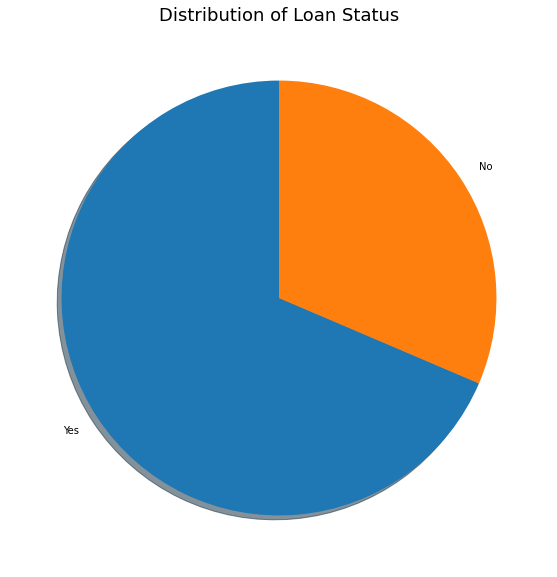

In [42]:
plt.figure(figsize=(10,10))
plt.pie(x=[419,192],labels=['Yes','No'],shadow=True,startangle=90)
plt.title('Distribution of Loan Status', fontsize=18)
plt.show()

In [43]:
# Let's find visualize the impacts of different factors on loan status.

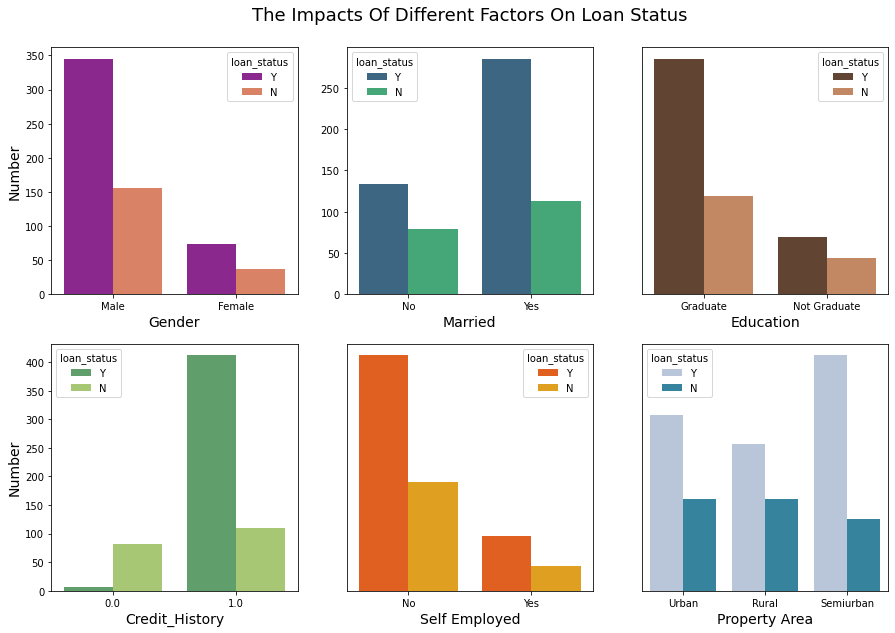

In [44]:
plt.figure(figsize=(15,10))

# plt.subplot(2,3,1)
# 2-row , 3-column , 1 - graph
plt.subplot(2,3,1)
sns.countplot(x='gender',hue='loan_status',data=df,palette='plasma')
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Number',fontsize=14)

plt.subplot(2,3,2)
sns.countplot(x='married',hue='loan_status',data=df,palette='viridis')
plt.ylabel('')
#plt.yticks([ ])
plt.xlabel('Married',fontsize=14)
plt.title('The Impacts Of Different Factors On Loan Status\n', fontsize=18)

plt.subplot(2,3,3)
sns.countplot(x='education',hue='loan_status',data=df,palette='copper')
plt.xlabel('Education',fontsize=14)
plt.ylabel('')
plt.yticks([])

plt.subplot(2,3,4)
sns.countplot(x='credit_history',data=df,hue='loan_status',palette='summer')
plt.xlabel('Credit_History',fontsize=14)
plt.ylabel('Number', fontsize=14)

plt.subplot(2,3,5)
sns.countplot(x='self_employed',data=df,hue='loan_status',palette='autumn')
plt.xlabel('Self Employed',fontsize=14)
plt.ylabel('')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.countplot(x='property_area',hue='loan_status',data=df,palette='PuBuGn')
plt.xlabel('Property Area', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])
plt.show()

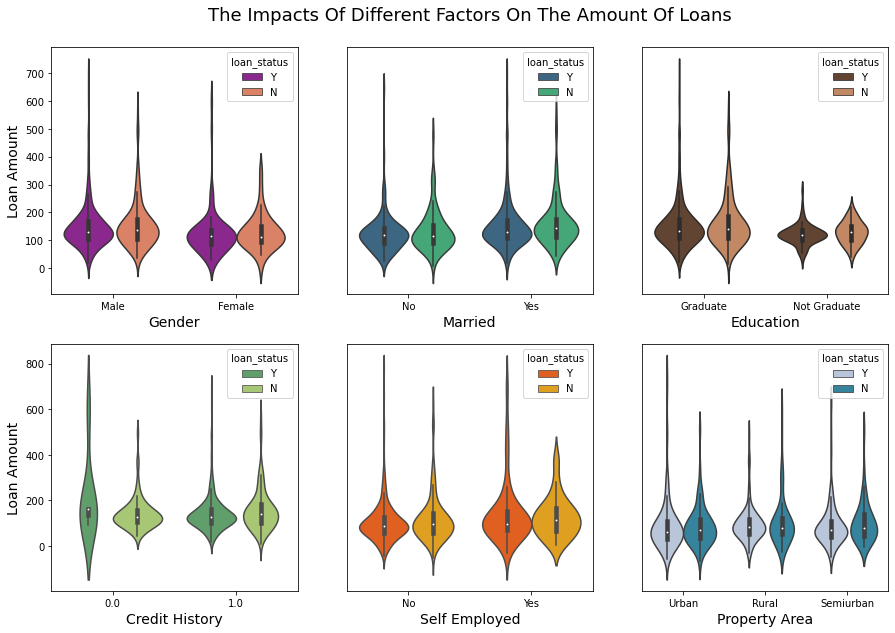

In [45]:
# Now we visualize the difrent factor on amount of loans

plt.figure(figsize=(15,10))
plt.title('The Impacts Of Different Factors On The Amount Of Loans\n', fontsize=18)

plt.subplot(2,3,1)
sns.violinplot(x='gender', y='loan_amount',hue='loan_status', data=df,palette='plasma')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)



plt.subplot(2,3,2)
sns.violinplot(x='married',y='loan_amount',hue='loan_status',data=df,palette='viridis')
plt.xlabel('Married',fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])
# Title displayed at the center as we apply this command on this subplot as it is in center
plt.title('The Impacts Of Different Factors On The Amount Of Loans\n', fontsize=18)


plt.subplot(2,3,3)
sns.violinplot(x='education',y='loan_amount',hue='loan_status',data=df,palette='copper')
plt.xlabel('Education', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.violinplot(x='credit_history',y='loan_amount', data=df,hue='loan_status',palette='summer')
plt.xlabel('Credit History', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)

plt.subplot(2,3,5)
sns.violinplot(x='self_employed',y='loan_amount',hue='loan_status',data=df,palette='autumn')
plt.xlabel('Self Employed', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.violinplot(x='property_area', y='loan_amount',data=df,hue='loan_status',palette='PuBuGn')
plt.xlabel('Property Area', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])
plt.show()


In [46]:
""" 
Now we analyze the distribution of :
    Applicant income , Co-Applicant , Loan_Amount 

"""


' \nNow we analyze the distribution of :\n    Applicant income , Co-Applicant , Loan_Amount \n\n'

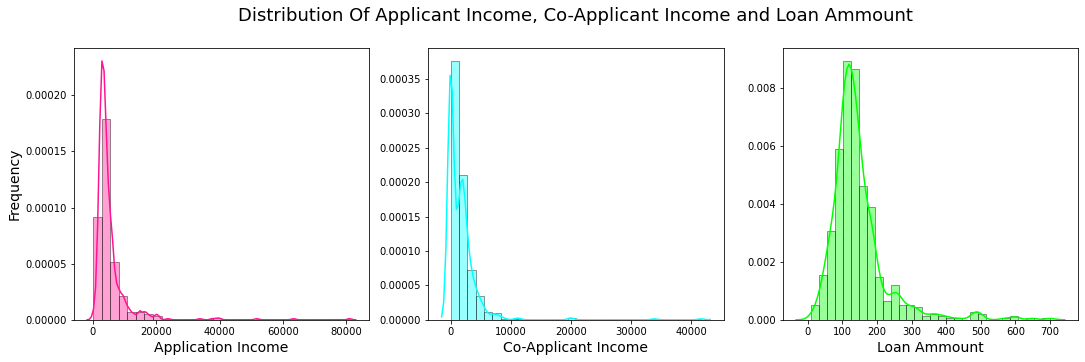

In [47]:
plt.figure(figsize=(18,5))
# 18 inches width , 5 inches height

plt.subplot(1,3,1)
sns.distplot(df['applicant_income'],bins=30,color='deeppink',hist_kws=dict(edgecolor='black'))
plt.xlabel('Application Income',fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(1,3,2)
sns.distplot(df['co-applicant_income'],bins=30,color='cyan',hist_kws=dict(edgecolor='black'))
plt.xlabel('Co-Applicant Income', fontsize=14)
plt.title('Distribution Of Applicant Income, Co-Applicant Income and Loan Ammount\n', fontsize=18)


plt.subplot(1,3,3)
sns.distplot(df['loan_amount'],bins=30,color='lime',hist_kws=dict(edgecolor='black'))
plt.xlabel('Loan Ammount', fontsize=14)
plt.show()

In [48]:
# Encoding Categorical Values
"""

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.
Machine learning algorithms can then decide in a better way on how those labels must be operated. 
It is an important pre-processing step for the structured dataset in supervised learning.

"""

'\n\nLabel Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.\nMachine learning algorithms can then decide in a better way on how those labels must be operated. \nIt is an important pre-processing step for the structured dataset in supervised learning.\n\n'

In [49]:
# Gender
le1=LabelEncoder()
le1.fit(df['gender'])
df['gender']=le1.transform(df['gender'])

In [50]:
# Married
le2=LabelEncoder()
le2.fit(df['married'])
df['married']=le2.transform(df['married'])

In [51]:
# Education
le3=LabelEncoder()
le3.fit(df['education'])
df['education']=le3.transform(df['education'])

In [52]:
# Self Employed
le4=LabelEncoder()
le4.fit(df['self_employed'])
df['self_employed']=le4.transform(df['self_employed'])

In [53]:
# Property Area
le5=LabelEncoder()
le5.fit(df['property_area'])
df['property_area']=le5.transform(df['property_area'])

In [54]:
# Dependents
le6=LabelEncoder()
le6.fit(df['dependents'])
df['dependents']=le6.transform(df['dependents'])

In [55]:
# Splitting the Data
X=df.drop(['loan_id','loan_status'],axis=1)
y=df['loan_status']


In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [57]:
# Logistic Regression

lr=LogisticRegression()
lr.fit(X,y)
predictions_lr=lr.predict(X_test)

C:\Users\dani8003\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
print(confusion_matrix(y_test,predictions_lr))
print('\n')
print(classification_report(y_test,predictions_lr))

[[23 22]
 [ 0 78]]


              precision    recall  f1-score   support

           N       1.00      0.51      0.68        45
           Y       0.78      1.00      0.88        78

    accuracy                           0.82       123
   macro avg       0.89      0.76      0.78       123
weighted avg       0.86      0.82      0.80       123



In [60]:
# Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predictions_dtc=dtc.predict(X_test)

In [61]:
print(confusion_matrix(y_test,predictions_dtc))
print("\n")
print(classification_report(y_test,predictions_dtc))

[[28 17]
 [15 63]]


              precision    recall  f1-score   support

           N       0.65      0.62      0.64        45
           Y       0.79      0.81      0.80        78

    accuracy                           0.74       123
   macro avg       0.72      0.71      0.72       123
weighted avg       0.74      0.74      0.74       123



In [62]:
# Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
predictions_rfc=rfc.predict(X_test)

In [63]:
print(confusion_matrix(y_test,predictions_rfc))
print("\n")
print(classification_report(y_test,predictions_rfc))

[[24 21]
 [ 2 76]]


              precision    recall  f1-score   support

           N       0.92      0.53      0.68        45
           Y       0.78      0.97      0.87        78

    accuracy                           0.81       123
   macro avg       0.85      0.75      0.77       123
weighted avg       0.83      0.81      0.80       123

